In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [4]:
# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df1 = df.copy()
# Drop irrelevant columns (e.g., customer IDs, names if present)
df1.drop(columns=['area code', 'phone number'], errors='ignore', inplace=True)

# Convert categorical variables to numeric
df1 = pd.get_dummies(df, drop_first=True)

In [7]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

# Convert back to DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_features, columns=df1.columns)

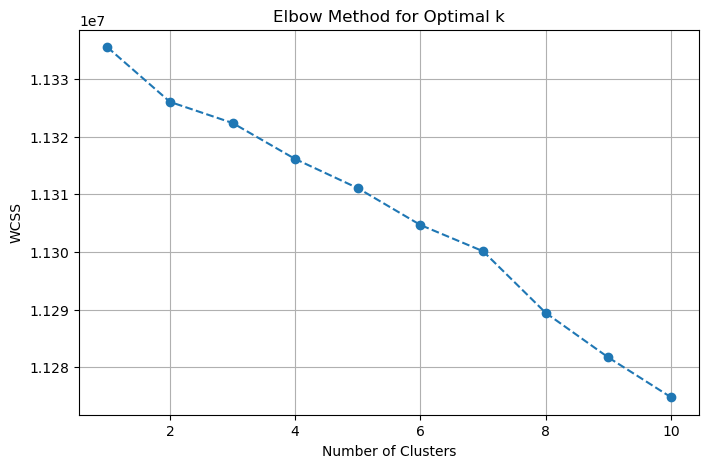

In [8]:
# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [9]:
# From the elbow plot, choose the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_df)
# Save the results to a CSV file for Power BI or Tableau visualization
df.to_csv('telecom_churn_clustered.csv', index=False)

# Evaluate clustering performance with Silhouette Score
silhouette_avg = silhouette_score(scaled_df, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.00


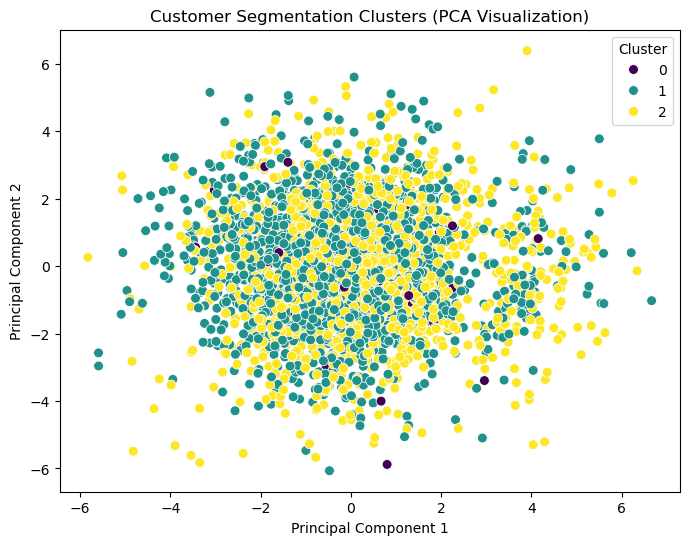

In [10]:
# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=50)
plt.title('Customer Segmentation Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Analyze cluster characteristics
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

         account length   area code  number vmail messages  total day minutes  \
Cluster                                                                         
0            101.687500  436.416667               7.020833         180.433333   
1            102.683380  421.677746               8.019155         163.956338   
2             99.142384  455.432450               8.227152         198.349073   

         total day calls  total day charge  total eve minutes  \
Cluster                                                         
0             100.500000         30.674375         198.939583   
1              99.464225         27.873138         205.605972   
2             101.575497         33.719854         195.607815   

         total eve calls  total eve charge  total night minutes  \
Cluster                                                           
0             101.250000         16.909583           192.506250   
1             102.725634         17.476687           217.154423   
